# Timer

In [66]:
def print_red(text):
    print('\x1b[31m' + text + '\x1b[0m')
    
def print_yellow(text):
    print('\x1b[33m' + text + '\x1b[0m')

def print_green(text):
    print('\x1b[32m' + text + '\x1b[0m')

def print_pink(text):
    print('\x1b[35m' + text + '\x1b[0m')

def print_cyan(text):
    print('\x1b[36m' + text + '\x1b[0m')

In [67]:
import os   
import subprocess 
import random

models_folder = '../models'  
models = [os.path.join(models_folder, f) for f in os.listdir(models_folder) if f.endswith('.mzn')]

instances_folder = '../instances'
instances = [os.path.join(instances_folder, f) for f in os.listdir(instances_folder) if f.endswith('.dzn')][:20]
# Remember, you are missing the stastic sample, calculate this number using len(instances) 
times = [0] * len(models)

punishment = 100000
timeout = 10
timeout_mzn = 3*1000

for i, model in enumerate(models):
    for instance in instances:
        # Run the minizinc command for the current model and data file  
        cmd = f"minizinc --solver Gecode --output-time {model} {instance} --output-time --solver-time-limit {timeout_mzn}" 
        proc = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE)
        try: 
            # Get output from fzn
            stdout, stderr = proc.communicate(timeout=timeout)
            
            try:
                mnt = int(stdout.decode().split(' ')[-5][:-4])
            except:
                mnt = punishment
            elapsed_time = float(stdout.decode().split(' ')[-2])
            
            print_green(f'{model} with {instance} SOLVED with a value of {mnt} in {elapsed_time:.2f} seconds.')
            times[i] = (times[i]+mnt)/2
        except subprocess.TimeoutExpired: 
            print_red(f'Error from minizinc: Stopping.')
            times[i] = (times[i]+timeout)/2
            if os.name == 'nt': # If the os is Windows
                subprocess.call(['taskkill', '/F', '/T', '/PID', str(proc.pid)]) # Force kill the process
            else:
                os.killpg(os.getpgid(proc.pid), signal.SIGTERM) # Kill the process group

"""for i, model in enumerate(models):
    for instance in instances:
        # Run the minizinc command for the current model and data file  
        cmd = f"minizinc --solver Gecode --output-time {model} {instance}" 
        proc = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE)
        try: 
            # Get output from fzn
            stdout, stderr = proc.communicate(timeout=timeout)
            elapsed_time = float(stdout.decode().split(' ')[-2])
            
            print(f'{model} with {instance} SOLVED in {elapsed_time:.2f} seconds.')
            times[i] = (times[i]+elapsed_time)/2
        except subprocess.TimeoutExpired: 
            print(f'{model} with {instance} TIMED OUT after {timeout} seconds.')
            times[i] = (times[i]+timeout)/2
            if os.name == 'nt': # If the os is Windows
                subprocess.call(['taskkill', '/F', '/T', '/PID', str(proc.pid)]) # Force kill the process
            else:
                os.killpg(os.getpgid(proc.pid), signal.SIGTERM) # Kill the process group
"""
print("----FINISHED----")


../models\anti_first_fail-indomain.mzn with ../instances\0.dzn SOLVED with a value of 280 in 3.10 seconds.
../models\anti_first_fail-indomain.mzn with ../instances\1.dzn SOLVED with a value of 90 in 3.10 seconds.
../models\anti_first_fail-indomain.mzn with ../instances\10.dzn SOLVED with a value of 150 in 3.10 seconds.
../models\anti_first_fail-indomain.mzn with ../instances\11.dzn SOLVED with a value of 130 in 3.10 seconds.
../models\anti_first_fail-indomain.mzn with ../instances\12.dzn SOLVED with a value of 230 in 3.09 seconds.
../models\anti_first_fail-indomain.mzn with ../instances\13.dzn SOLVED with a value of 100 in 3.10 seconds.
../models\anti_first_fail-indomain.mzn with ../instances\14.dzn SOLVED with a value of 1190 in 3.20 seconds.
../models\anti_first_fail-indomain.mzn with ../instances\15.dzn SOLVED with a value of 180 in 3.09 seconds.
../models\anti_first_fail-indomain.mzn with ../instances\16.dzn SOLVED with a value of 100 in 3.09 seconds.
../models\anti_first_fail-indo

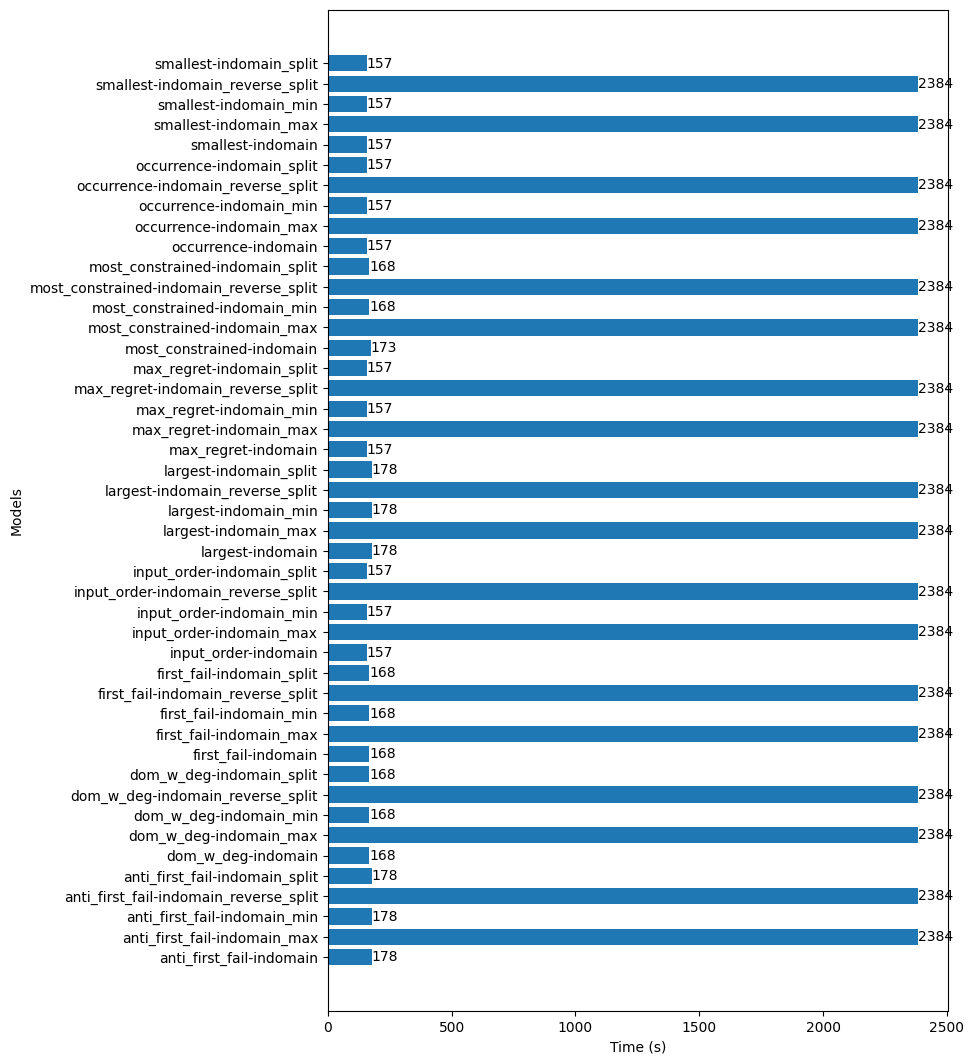

In [70]:
import matplotlib.pyplot as plt 

# Define figure size
fig, ax = plt.subplots(figsize=(8, 13))
# CUT
limit = 20000

models_folder = '../models'  
models = [os.path.join(models_folder, f) for f in os.listdir(models_folder) if f.endswith('.mzn')]
# Filter models and times
models = [model for i, model in enumerate(models) if times[i] < limit] 
models = [model.replace("../models\\", "").replace(".mzn", "") for model in models]
sav_times = [int(time) for time in times if time < limit]

# Use barh function to create horizontal bar chart
ax.barh(models, sav_times)

# Set x-axis label and y-axis label
ax.set_xlabel('Time (s)')
ax.set_ylabel('Models')

# Add value labels next to each bar
for i, v in enumerate(sav_times):
    ax.text(v, i, str(v), color='black', ha='left', va='center')

# Show the plot
plt.show()


In [69]:
import psutil

for proc in psutil.process_iter(['pid', 'name', 'username']):
    try:
        pinfo = proc.as_dict(attrs=['pid', 'name', 'username'])
        if 'jupyter' in pinfo['name']:
            print(pinfo)
    except (psutil.NoSuchProcess, psutil.AccessDenied, psutil.ZombieProcess):
        pass


{'name': 'jupyter-lab.exe', 'pid': 13096, 'username': 'DESKTOP-IH8383S\\juanj'}
{'name': 'jupyter.exe', 'pid': 18740, 'username': 'DESKTOP-IH8383S\\juanj'}
